# 第4章: 言語解析

問題30から問題35までは、以下の文章 `text`（太宰治の『走れメロス』の冒頭部分）に対して、言語解析を実施せよ。問題36から問題39までは、国家を説明した文書群（日本語版ウィキペディア記事から抽出したテキスト群）をコーパスとして、言語解析を実施せよ。

In [26]:
import MeCab
import unidic


text = """
メロスは激怒した。
必ず、かの邪智暴虐の王を除かなければならぬと決意した。
メロスには政治がわからぬ。
メロスは、村の牧人である。
笛を吹き、羊と遊んで暮して来た。
けれども邪悪に対しては、人一倍に敏感であった。
"""
mecabrc = "/opt/homebrew/etc/mecabrc"
dicdir  = unidic.DICDIR
tagger = MeCab.Tagger(f"-r {mecabrc} -d {dicdir}")

node = tagger.parseToNode(text)     # `node` is a linked list

while node:
    print(f'surface:{node.surface}, feature: {node.feature}')
    node = node.next

surface:, feature: BOS/EOS,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*
surface:メロス, feature: 名詞,普通名詞,一般,*,*,*,メロス,メロス-melos,メロス,メロス,メロス,メロス,外,*,*,*,*,*,*,体,メロス,メロス,メロス,メロス,1,C1,*,37122544834322944,135051
surface:は, feature: 助詞,係助詞,*,*,*,*,ハ,は,は,ワ,は,ワ,和,*,*,*,*,*,*,係助,ハ,ハ,ハ,ハ,*,"動詞%F2@0,名詞%F1,形容詞%F2@-1",*,8059703733133824,29321
surface:激怒, feature: 名詞,普通名詞,サ変可能,*,*,*,ゲキド,激怒,激怒,ゲキド,激怒,ゲキド,漢,*,*,*,*,*,*,体,ゲキド,ゲキド,ゲキド,ゲキド,1,C1,*,3167426745344512,11523
surface:し, feature: 動詞,非自立可能,*,*,サ行変格,連用形-一般,スル,為る,し,シ,する,スル,和,*,*,*,*,*,*,用,シ,スル,シ,スル,0,C5,*,5370298291593857,19537
surface:た, feature: 助動詞,*,*,*,助動詞-タ,終止形-一般,タ,た,た,タ,た,タ,和,*,*,*,*,*,*,助動,タ,タ,タ,タ,*,"動詞%F2@1,形容詞%F4@-2",*,5948916285711019,21642
surface:。, feature: 補助記号,句点,*,*,*,*,*,。,。,*,。,*,記号,*,*,*,*,*,*,補助,*,*,*,*,*,*,*,6880571302400,25
surface:必ず, feature: 副詞,*,*,*,*,*,カナラズ,必ず,必ず,カナラズ,必ず,カナラズ,和,*,*,*,*,*,*,相,カナラズ,カナラズ,カナラズ,カナラズ,0,*,*,1899964749980160,6912
surface:、, feature: 補助記号,読点,*,*,*,*,*,、,、,*,、,*,記号,*,*,*,*,*,*,補助,*,*,*,*,*,*,*,6605693395456,24


## 30. 動詞
文章 `text` に含まれる動詞をすべて表示せよ。

In [28]:
import MeCab


tagger = MeCab.Tagger(f"-r {mecabrc} -d {dicdir}")
node = tagger.parseToNode(text)

ans = []  # Save verbs

while node:
    # Split features with ',' so that the property can be matched.
    parts = node.feature.split(',')
    # If this token represents a verb...
    if parts[0] == '動詞':
        ans.append(node.surface)
    node = node.next

print(ans)


['し', '除か', 'なら', 'し', 'わから', 'ある', '吹き', '遊ん', '暮し', '来', '対し', 'あっ']


## 31. 動詞の原型
文章 `text` に含まれる動詞と、その原型をすべて表示せよ。

In [30]:
import MeCab

tagger = MeCab.Tagger(f"-r {mecabrc} -d {dicdir}")
node = tagger.parseToNode(text)

ans = []

while node:
    parts = node.feature.split(',')
    if parts[0] == '動詞':
        ans.append((node.surface, parts[10]))
    node = node.next

for surface, base in ans:
    print(f'surface: {surface}, base: {base}')

surface: し, base: する
surface: 除か, base: 除く
surface: なら, base: なる
surface: し, base: する
surface: わから, base: わかる
surface: ある, base: ある
surface: 吹き, base: 吹く
surface: 遊ん, base: 遊ぶ
surface: 暮し, base: 暮す
surface: 来, base: 来る
surface: 対し, base: 対する
surface: あっ, base: ある


## 32. 「AのB」
文章 `text` において、2つの名詞が「の」で連結されている名詞句をすべて抽出せよ。

In [31]:
import MeCab


def check_noun_no_noun(node):
    if node.next and node.next.next:
        if node.feature.split(',')[0] == '名詞' and node.next.surface == 'の' and node.next.next.feature.split(',')[0] == '名詞':
            return True
    return False
    

tagger = MeCab.Tagger(f"-r {mecabrc} -d {dicdir}")
node = tagger.parseToNode(text)
ans = []

while node:
    # Check if current node satisfies the format.
    if check_noun_no_noun(node):
        ans.append(node.surface + 'の' + node.next.next.surface)
    node = node.next

print(ans)

['暴虐の王', '村の牧人']


## 33. 係り受け解析
文章 `text` に係り受け解析を適用し、係り元と係り先のトークン（形態素や文節などの単位）をタブ区切り形式ですべて抽出せよ。

In [ ]:
import spacy


text = """
メロスは激怒した。
必ず、かの邪智暴虐の王を除かなければならぬと決意した。
メロスには政治がわからぬ。
メロスは、村の牧人である。
笛を吹き、羊と遊んで暮して来た。
けれども邪悪に対しては、人一倍に敏感であった。
"""

nlp = spacy.load("ja_ginza_electra")

doc = nlp(text)
for tok in doc:
    if tok.dep_ != "ROOT":
        print(f"{tok.head.text}\t{tok.text}")


## 34. 主述の関係
文章 `text` において、「メロス」が主語であるときの述語を抽出せよ。

In [ ]:
import spacy


nlp = spacy.load('ja_ginza_electra')

# Process the input text into a Doc object, which contains tokens and annotations
doc = nlp(text)

ans = []
for tok in doc:
    # If the token text is "メロス" and its dependency label indicates a nominal subject
    if tok.text == 'メロス' and tok.dep_ == 'nsubj':
        ans.append(tok.head.text)

print(ans)

/opt/anaconda3/envs/python39/lib/python3.9/site-packages/huggingface_hub/file_download.py:797: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


['激怒', '牧人']


## 35. 係り受け木
「メロスは激怒した。」の係り受け木を可視化せよ。

In [ ]:
import spacy
from spacy import displacy


nlp = spacy.load("ja_ginza_electra")

text = "メロスは激怒した。"

doc = nlp(text)

# Plot
displacy.render(doc, style="dep", jupyter=True, options={
    "compact": True,        # Reduce blank space
    "distance": 100,        # Set length of the arrows between tokens
    "color": "green",        # Set color
    "font": "IPAexGothic",  # Set font
})

## 36. 単語の出現頻度
問題36から39までは、Wikipediaの記事を以下のフォーマットで書き出したファイルjawiki-country.json.gzをコーパスと見なし、統計的な分析を行う。

- 1行に1記事の情報がJSON形式で格納される

- 各行には記事名が”title”キーに、記事本文が”text”キーの辞書オブジェクトに格納され、そのオブジェクトがJSON形式で書き出される

- ファイル全体はgzipで圧縮される

まず、第3章の処理内容を参考に、Wikipedia記事からマークアップを除去し、各記事のテキストを抽出せよ。そして、コーパスにおける単語（形態素）の出現頻度を求め、出現頻度の高い20語とその出現頻度を表示せよ。

In [32]:
import json
import re
import MeCab
from collections import Counter


def remove_markup(s):
    # Remove ref>…</ref>.
    s = re.sub(r"<ref>.*?</ref>", "", s)
    # Remove {{…}}.
    s = re.sub(r"\{\{.*?\}\}", "", s)
    # Remove [[A|B]] or [[A]].
    s = re.sub(r"\[\[(?:[^|\]]*\|)?([^|\]]+)\]\]", r"\1", s)
    # Remove bold markup and italic markup
    s = s.replace("''", "")
    return s



tagger = MeCab.Tagger(f"-r {mecabrc} -d {dicdir}")
freq = Counter()

with open('jawiki-country.json', 'r') as f:
    for line in f:
        obj = json.loads(line)
        clean = remove_markup(obj["text"])
        node = tagger.parseToNode(clean)
        while node:
            parts = node.feature.split(',')
            if parts[0] in ("名詞", "動詞", "形容詞", "副詞"):
                freq[node.surface] += 1
            node = node.next

for word, count in freq.most_common(20):
    print(f"{word}\t{count}")

し	29735
年	26265
いる	13325
さ	12160
ある	11620
月	10483
する	9442
1	6807
語	6694
ref	6406
2	6314
日本	5187
なっ	4680
こと	4557
3	4303
name	3878
い	3779
世界	3647
5	3556
4	3553


## 37. 名詞の出現頻度
コーパスにおける名詞の出現頻度を求め、出現頻度の高い20語とその出現頻度を表示せよ。

In [33]:
import json
import re
import MeCab
from collections import Counter


def remove_markup(s):
    # Remove ref>…</ref>.
    s = re.sub(r"<ref>.*?</ref>", "", s)
    # Remove {{…}}.
    s = re.sub(r"\{\{.*?\}\}", "", s)
    # Remove [[A|B]] or [[A]].
    s = re.sub(r"\[\[(?:[^|\]]*\|)?([^|\]]+)\]\]", r"\1", s)
    # Remove bold markup and italic markup
    s = s.replace("''", "")
    return s



tagger = MeCab.Tagger(f"-r {mecabrc} -d {dicdir}")
freq = Counter()

with open('jawiki-country.json', 'r') as f:
    for line in f:
        obj = json.loads(line)
        clean = remove_markup(obj["text"])
        node = tagger.parseToNode(clean)
        while node:
            parts = node.feature.split(',')
            if parts[0] == "名詞":
                freq[node.surface] += 1
            node = node.next

for word, count in freq.most_common(20):
    print(f"{word}\t{count}")

年	26265
月	10483
1	6807
語	6694
ref	6406
2	6314
日本	5187
こと	4557
3	4303
name	3878
世界	3647
5	3556
4	3553
共和	3439
大統領	3422
政府	3383
ため	3163
thumb	3048
人口	2796
経済	2766


## 38. TF・IDF
日本に関する記事における名詞のTF・IDFスコアを求め、TF・IDFスコア上位20語とそのTF, IDF, TF・IDFを表示せよ。

In [34]:
import json
import MeCab
import math
import re
from collections import Counter


tagger = MeCab.Tagger(f"-r {mecabrc} -d {dicdir}")

n = 0   # number of files
df = Counter()  # a dictionary: {word : number of files where the word happen}
tf_japan = Counter()
n_japan = 0

with open('jawiki-country.json', 'r') as f:
    for line in f:
        # Count files
        n += 1

        # Load the current file
        article = json.loads(line)
        text = remove_markup(article['text'])

        # Collect all the nouns in the current file
        node = tagger.parseToNode(text)
        nouns = []

        # Collect all the nouns in the current file
        while node:
            surface = node.surface
            if re.fullmatch(r'[A-Za-z0-9]+', surface):
                node = node.next
                continue
            if node.feature.split(',')[0] == '名詞':
                nouns.append(surface)
            node = node.next

        # If the title is 日本, compute the times of appearing at article whose title is '日本'
        # This is not a real tf_japan
        if article['title'] == '日本':
            tf_japan = Counter(nouns)
            n_japan = len(nouns)
        # Count df
        for noun in set(nouns):
            df[noun] += 1

# Obtain the real tf_japan by deviding the number of words in article whose title is '日本'.
for word in tf_japan:
    tf_japan[word] /= n_japan
results = []
for noun, tf in tf_japan.items():
    idf = math.log(n / df[noun])
    tfidf = tf * idf
    results.append((noun, tf, idf, tfidf))

for noun, tf, idf, tfidf in sorted(results, key=lambda x: x[3], reverse=True)[:20]:
    print(f'{noun}\ttf: {tf}\tidf: {idf:.4f}\ttf * idf: {tfidf:.4f}')

天皇	tf: 0.0033921613568645426	idf: 2.6802	tf * idf: 0.0091
倭国	tf: 0.0014210405684162274	idf: 4.8203	tf * idf: 0.0068
朝鮮	tf: 0.002842081136832455	idf: 2.2553	tf * idf: 0.0064
列島	tf: 0.0019711207884483156	idf: 3.1155	tf * idf: 0.0061
書紀	tf: 0.001100160440064176	idf: 5.5134	tf * idf: 0.0061
明治	tf: 0.0022461608984643594	idf: 2.3779	tf * idf: 0.0053
琉球	tf: 0.0011918404767361907	idf: 4.4148	tf * idf: 0.0053
沖縄	tf: 0.0017877607151042861	idf: 2.8744	tf * idf: 0.0051
倭	tf: 0.0010543204217281687	idf: 4.8203	tf * idf: 0.0051
県	tf: 0.007930323172129269	idf: 0.6156	tf * idf: 0.0049
北海道	tf: 0.0017419206967682788	idf: 2.6231	tf * idf: 0.0046
神武	tf: 0.0007792803117121247	idf: 5.5134	tf * idf: 0.0043
千島	tf: 0.000825120330048132	idf: 4.8203	tf * idf: 0.0040
韓国	tf: 0.0024295209718083887	idf: 1.6014	tf * idf: 0.0039
昭和	tf: 0.001512720605088242	idf: 2.5177	tf * idf: 0.0038
にほん	tf: 0.0006876002750401101	idf: 5.5134	tf * idf: 0.0038
にっぽん	tf: 0.0006876002750401101	idf: 5.5134	tf * idf: 0.0038
樺太	tf: 0.00091680

## 39. Zipfの法則
コーパスにおける単語の出現頻度順位を横軸、その出現頻度を縦軸として、両対数グラフをプロットせよ。

In [36]:
import MeCab
import json
import pickle
from collections import Counter


tagger = MeCab.Tagger(f"-r {mecabrc} -d {dicdir}")

freq = Counter()
with open('jawiki-country.json', 'r') as f:
    for line in f:
        article = json.loads(line)
        node = tagger.parseToNode(article['text'])
        while node:
            surface = node.surface
            parts = node.feature.split('t')
            if parts[0] != '記号' and surface.strip():
                freq[surface] += 1
            node = node.next

counts = [count for _, count in freq.most_common()]
ranks  = list(range(1, len(counts) + 1))

# Use pkl file to store temporary data to avoid libraries collision (numpy).
with open('zipf_data.pkl', 'wb') as f:
    pickle.dump({'counts': counts, 'ranks': ranks}, f)

/opt/anaconda3/envs/nlp100/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 20986 (\N{CJK UNIFIED IDEOGRAPH-51FA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/nlp100/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 29694 (\N{CJK UNIFIED IDEOGRAPH-73FE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/nlp100/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 38971 (\N{CJK UNIFIED IDEOGRAPH-983B}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/nlp100/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/nlp100/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 38918

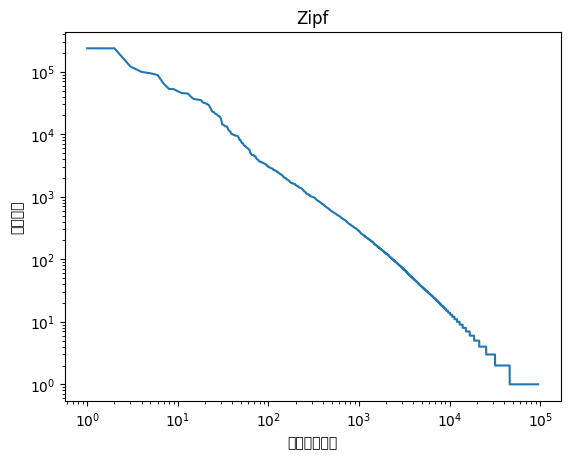

In [38]:
import pickle
import matplotlib.pyplot as plt


with open('zipf_data.pkl', 'rb') as f:
    data = pickle.load(f)

counts = data['counts']
ranks = data['ranks']

plt.figure()
plt.loglog(ranks, counts)
plt.xlabel('出現頻度順位')
plt.ylabel('出現頻度')
plt.title('Zipf')
plt.show()